In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, compiler, circuit, compiler
import math
import time
import matplotlib.pyplot as plt

import QuantumPartonShower as qps
import QuantumPartonShower_clean as qpsc
import plotting as pl
import matplotlib

from PaperPlots import MakeObservables as mo

Number of emissions:  1
log(theta_max):  (-5.180816459236603, array([-5.18081646, -1.72693882]), array([-6.90775528, -3.45387764,  0.        ]))
Number of emissions:  1
log(theta_max):  (-1.7269388197455342, array([-5.18081646, -1.72693882]), array([-6.90775528, -3.45387764,  0.        ]))
Number of emissions:  2
log(theta_max):  (-1.7269388197455342, array([-5.18081646, -1.72693882]), array([-6.90775528, -3.45387764,  0.        ]))
Number of emissions:  1
log(theta_max):  (-3.4538776394910684, array([-5.75646273, -3.45387764, -1.15129255]), array([-6.90775528, -4.60517019, -2.30258509,  0.        ]))


## Count gate costs of the old circuits (pre-remeasurement)

In [19]:
eps= 0.001
g_1= 2
g_2= 1
#g_12= 1
initialParticles= ['100'] # 1 a-fermion

#shots= 10000

N= 12

cx_naive= np.zeros(N-1)
for n in range(1, N):
    qps1= qps.QuantumPartonShower(n, 1)
    qc, qubits= qps1.createCircuit(eps, g_1, g_2, 1, initialParticles)

    #qcT= compiler.transpile(qc, basis_gates=['u1', 'u2', 'u3', 'h', 'z', 'y', 'x', 'ry', 'rz', 'rx', 'cx'], optimization_level= 1)

    print('Qubits: ' + str(qc.num_qubits))
    print('Clbits: ' + str(qc.num_clbits))
    print('Gates: ' + str(qc.count_ops()))
    #print('Transpiled Gates: ' + str(qcT.count_ops()))
    #print(qcT.count_ops()['cx'])
    #cx_naive[n]= qcT.count_ops()['cx']
    ops= qc.count_ops()
    cx_naive[n-1]= int(ops['cx'] + 6*ops['ccx'] + ops['ch'] + 2*ops['cry']) 
    print(cx_naive[n-1])
    
#np.save('cx_naive', cx_naive)

ga= 2.6180, gb= 0.3820, u= 0.5257

m=0, Length of countsList= 3

m= 0
k:  0
generated circuit on 11 qubits
Qubits: 20
Clbits: 0
Gates: OrderedDict([('ccx', 149), ('x', 126), ('cry', 17), ('cx', 7), ('ch', 1)])
936.0
ga= 2.6180, gb= 0.3820, u= 0.5257

m=0, Length of countsList= 3

m= 0
k:  0

m=1, Length of countsList= 9

m= 1
k:  0
k:  1
generated circuit on 11 qubits
Qubits: 33
Clbits: 0
Gates: OrderedDict([('ccx', 1105), ('x', 973), ('cry', 75), ('cx', 20), ('ch', 3)])
6803.0
ga= 2.6180, gb= 0.3820, u= 0.5257

m=0, Length of countsList= 3

m= 0
k:  0

m=1, Length of countsList= 9

m= 1
k:  0
k:  1

m=2, Length of countsList= 19

m= 2
k:  0
k:  1
k:  2
generated circuit on 11 qubits
Qubits: 38
Clbits: 0
Gates: OrderedDict([('ccx', 3376), ('x', 2866), ('cry', 208), ('cx', 63), ('ch', 6)])
20741.0
ga= 2.6180, gb= 0.3820, u= 0.5257

m=0, Length of countsList= 3

m= 0
k:  0

m=1, Length of countsList= 9

m= 1
k:  0
k:  1

m=2, Length of countsList= 19

m= 2
k:  0
k:  1
k:  2

m=3, Length 

In [6]:
def combis(m, ni):
    return ((m+1) / 6) * (m**2 + 3*m*ni + 5*m + 3*ni**2 + 9*ni + 6)

def combis_1(m):
    return (1 / 6) * (m**3 + 9*m**2 + 26*m + 18)

ni= 1
for m in range(0, 10):
    print(combis(m, ni))
    print(combis_1(m))
    print('\n')

3.0
3.0


9.0
9.0


19.0
19.0


34.0
34.0


55.0
55.0


83.0
83.0


119.00000000000001
119.0


164.0
164.0


219.0
219.0


285.0
285.0




## Count gate costs of the hacked remeasurment circuit (e.g. with combinatorial number of classical controls)

In [7]:
eps= 0.001
g_1= 2
g_2= 1
#g_12= 1
initialParticles= ['100'] # 1 a-fermion

#shots= 10000

N= 7

cx_hack= np.zeros(N-1)
for n in range(1, N):
    qps1= qpsc.QuantumPartonShower(n, 1)
    qc, qubits= qps1.createCircuit(eps, g_1, g_2, 1, initialParticles)

    #qcT= compiler.transpile(qc, basis_gates=['u1', 'u2', 'u3', 'h', 'z', 'y', 'x', 'ry', 'rz', 'rx', 'cx'], optimization_level= 1)

    print('Qubits: ' + str(qc.num_qubits))
    print('Clbits: ' + str(qc.num_clbits))
    print('Gates: ' + str(qc.count_ops()))
    #print('Transpiled Gates: ' + str(qcT.count_ops()))
    #print(qcT.count_ops()['cx'])
    #cx_hack[n]= qcT.count_ops()['cx']
    ops= qc.count_ops()
    cx_hack[n-1]= int(ops['cx'] + 6*ops['ccx'] + ops['ch'] + 2*ops['cry']) 
    print(cx_hack[n-1])
    
np.save('cx_hack', cx_hack)



m= 0


Apply uCount()...
Apply uE()...
Apply U_h()...
Measure and reset |h>...
Apply U_p()...
generated circuit on [QuantumRegister(6, 'p'), QuantumRegister(2, 'h'), QuantumRegister(1, 'w_h'), QuantumRegister(1, 'e'), QuantumRegister(3, 'w'), QuantumRegister(2, 'n_a'), QuantumRegister(1, 'w_a')] qubits
Qubits: 16
Clbits: 16
Gates: OrderedDict([('ccx', 53), ('x', 52), ('cry', 13), ('cx', 11), ('measure', 2), ('reset', 2), ('ch', 1)])
356.0


m= 0


Apply uCount()...
Apply uE()...
Apply U_h()...
Measure and reset |h>...
Apply U_p()...


m= 1


Apply uCount()...
Apply uE()...
Apply U_h()...
Measure and reset |h>...
Apply U_p()...
generated circuit on [QuantumRegister(9, 'p'), QuantumRegister(2, 'h'), QuantumRegister(1, 'w_h'), QuantumRegister(1, 'e'), QuantumRegister(3, 'w'), QuantumRegister(2, 'n_a'), QuantumRegister(1, 'w_a')] qubits
Qubits: 19
Clbits: 21
Gates: OrderedDict([('ccx', 278), ('x', 259), ('cry', 46), ('cx', 40), ('measure', 4), ('reset', 4), ('ch', 4)])
1804.0


m= 0


Ap

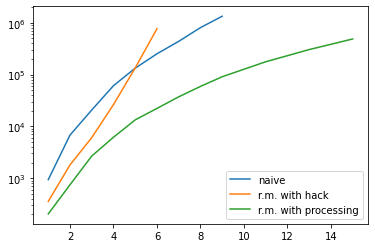

In [242]:
#plt.plot(np.arange(1, 10), np.log2(np.load('cx_naive.npy')), label= 'naive')
#plt.plot(np.arange(1, 7), np.log2(np.load('cx_hack.npy')), label= 'r.m. with hack')
#plt.plot(np.arange(1, 16), np.log2(total), label= 'r.m. with processing')

plt.plot(np.arange(1, 10), np.load('cx_naive.npy'), label= 'naive')
plt.plot(np.arange(1, 7), np.load('cx_hack.npy'), label= 'r.m. with hack')
plt.plot(np.arange(1, 16), total, label= 'r.m. with processing')
plt.yscale('log')

plt.legend()
plt.show()

In [38]:
data= qc.data

for j in range(len(data)):
#for j in range(10):
    for qubit in data[j][1]:
        if qubit.register.name == 'w_h':
            #print('\n')
            #print(data[j])
            print(qubit)

Qubit(QuantumRegister(4, 'w_h'), 0)
Qubit(QuantumRegister(4, 'w_h'), 0)
Qubit(QuantumRegister(4, 'w_h'), 0)
Qubit(QuantumRegister(4, 'w_h'), 0)
Qubit(QuantumRegister(4, 'w_h'), 0)
Qubit(QuantumRegister(4, 'w_h'), 0)
Qubit(QuantumRegister(4, 'w_h'), 0)
Qubit(QuantumRegister(4, 'w_h'), 0)
Qubit(QuantumRegister(4, 'w_h'), 0)
Qubit(QuantumRegister(4, 'w_h'), 0)
Qubit(QuantumRegister(4, 'w_h'), 0)
Qubit(QuantumRegister(4, 'w_h'), 0)
Qubit(QuantumRegister(4, 'w_h'), 0)
Qubit(QuantumRegister(4, 'w_h'), 0)
Qubit(QuantumRegister(4, 'w_h'), 0)
Qubit(QuantumRegister(4, 'w_h'), 0)
Qubit(QuantumRegister(4, 'w_h'), 0)
Qubit(QuantumRegister(4, 'w_h'), 0)
Qubit(QuantumRegister(4, 'w_h'), 0)
Qubit(QuantumRegister(4, 'w_h'), 0)
Qubit(QuantumRegister(4, 'w_h'), 0)
Qubit(QuantumRegister(4, 'w_h'), 0)
Qubit(QuantumRegister(4, 'w_h'), 0)
Qubit(QuantumRegister(4, 'w_h'), 0)
Qubit(QuantumRegister(4, 'w_h'), 0)
Qubit(QuantumRegister(4, 'w_h'), 0)
Qubit(QuantumRegister(4, 'w_h'), 0)
Qubit(QuantumRegister(4, 'w_

<ipython-input-38-fe12c1589137>:6: DeprecationWarning: Back-references to from Bit instances to their containing Registers have been deprecated. Instead, inspect Registers to find their contained Bits.
  if qubit.register.name == 'w_h':


In [47]:
import QuantumPartonShower_single_hRegcl_repackaged as ayo

simulator = Aer.get_backend('qasm_simulator')

eps= 0.001
g_1= 2
g_2= 1
#g_12= 1
initialParticles= ['100'] # 1 a-fermion

shots= 10

qps1= ayo.QuantumPartonShower(2, 1)
qc1, qubits1= qps1.createCircuit(eps, g_1, g_2, 1, initialParticles)
qcT1= compiler.transpile(qc1, basis_gates=['u1', 'u2', 'u3', 'h', 'z', 'y', 'x', 'ry', 'rz', 'rx', 'cx'], optimization_level= 2)

print('Qubits: ' + str(qc.num_qubits))
print('Clbits: ' + str(qc.num_clbits))
print('Gates: ' + str(qc.count_ops()))
print('Transpiled Gates: ' + str(qcT.count_ops()))



m= 0


Apply uCount()...
Apply uE()...
	hmap= {(1, 0): [[]]}
		n_tot, n_phi= 1, 0
None
Apply U_h()...
	hmap= {(1, 0): [[]]}
	k:  0
		 n_tot, n_phi= (1, 0)
		 h_bool= None
		 h_bool= None
			 n_a= 0
0 0 1
			 n_a= 1
0 1 0
Measure and reset |h>...
Apply U_p()...
[['00'], ['01']]
[['01']]
1


m= 1


Apply uCount()...
Apply uE()...
	hmap= {(1, 0): [['00']], (2, 1): [['01']]}
		n_tot, n_phi= 1, 0
[0]
		n_tot, n_phi= 2, 1
[1]
Apply U_h()...
	hmap= {(1, 0): [['00']], (2, 1): [['01']]}
	k:  1
		 n_tot, n_phi= (1, 0)
		 h_bool= [0]
		 h_bool= [0]
			 n_a= 0
0 0 1
			 n_a= 1
0 1 0
		 n_tot, n_phi= (2, 1)
		 h_bool= [1]
		 h_bool= [1]
			 n_a= 0
1 0 1
			 n_a= 1
1 1 0
	hmap= {(1, 0): [[]]}
	k:  0
		 n_tot, n_phi= (1, 0)
		 h_bool= None
		 h_bool= None
			 n_a= 0
0 0 1
			 n_a= 1
0 1 0
Measure and reset |h>...
Apply U_p()...
[['00', '00'], ['01', '00'], ['00', '01'], ['01', '01'], ['10', '01']]
[['01', '00'], ['01', '01']]
4
5
[['00', '00'], ['01', '00'], ['00', '01'], ['01', '01'], ['10', '01']

In [48]:
data= qc.data

for j in range(len(data)):
#for j in range(10):
    print(data[j])
    #for qubit in data[j][1]:
        #if qubit.register.name == 'w_h':
            #print('\n')
            #print(data[j])
            #print(qubit)

(<qiskit.circuit.library.standard_gates.x.XGate object at 0x7fe34a9d5820>, [Qubit(QuantumRegister(9, 'p'), 2)], [])
(<qiskit.circuit.library.standard_gates.ry.CRYGate object at 0x7fe3495da400>, [Qubit(QuantumRegister(9, 'p'), 2), Qubit(QuantumRegister(9, 'p'), 0)], [])
(<qiskit.circuit.library.standard_gates.ry.CRYGate object at 0x7fe3495dac10>, [Qubit(QuantumRegister(9, 'p'), 5), Qubit(QuantumRegister(9, 'p'), 3)], [])
(<qiskit.circuit.library.standard_gates.ry.CRYGate object at 0x7fe34aee2a60>, [Qubit(QuantumRegister(9, 'p'), 8), Qubit(QuantumRegister(9, 'p'), 6)], [])
(<qiskit.circuit.library.standard_gates.x.XGate object at 0x7fe3478a1bb0>, [Qubit(QuantumRegister(9, 'p'), 0)], [])
(<qiskit.circuit.library.standard_gates.x.CCXGate object at 0x7fe3478a1af0>, [Qubit(QuantumRegister(9, 'p'), 0), Qubit(QuantumRegister(9, 'p'), 2), Qubit(QuantumRegister(3, 'w'), 0)], [])
(<qiskit.circuit.library.standard_gates.x.XGate object at 0x7fe3478a19d0>, [Qubit(QuantumRegister(9, 'p'), 0)], [])
(<

In [46]:
qc.draw()

┌───┐               »
    w_0: ─────────────────────────────────────────────┤ X ├───────■───────»
                                                      └─┬─┘       │       »
    w_1: ───────────────────────────────────────────────┼─────────┼───────»
                                                        │         │       »
    w_2: ───────────────────────────────────────────────┼─────────┼───────»
                        ┌─────────────┐     ┌───┐       │  ┌───┐  │  ┌───┐»
    p_0: ───────────────┤ Ry(-1.1071) ├─────┤ X ├───────■──┤ X ├──┼──┤ X ├»
              ┌───┐     └──────┬──────┘     └───┘       │  └───┘  │  └───┘»
    p_1: ─────┤ X ├────────────┼────────────────────────┼─────────┼───────»
              ├───┤            │                        │         │       »
    p_2: ─────┤ X ├────────────■────────────────────────■─────────┼───────»
         ┌────┴───┴────┐                                          │       »
    p_3: ┤ Ry(-1.1071) ├──────────────────────────────────────────┼───────»
         └──────┬──────┘                                          │       »
    p_4: ───────┼─────────────────────────────────────────────────┼───────»
                │                                                 │       »
    p_5: ───────■─────────────────────────────────────────────────┼───────»
         ┌─────────────┐ ┌────────────┐┌─────────────┐            │       »
    p_6: ┤ Ry(-1.1071) ├─┤ Ry(1.1071) ├┤ Ry(-1.1071) ├────────────┼───────»
         └──────┬──────┘ └─────┬──────┘└──────┬──────┘            │       »
    p_7: ───────┼──────────────┼──────────────┼───────────────────┼───────»
                │              │              │                   │       »
    p_8: ───────■──────────────■──────────────■───────────────────┼───────»
                                                                  │       »
    h_0: ─────────────────────────────────────────────────────────┼───────»
                              ┌─┐                                 │       »
    h_1: ─────────────────────┤M├────────────|0>──────────────────┼───────»
                              └╥┘                                 │       »
    e_0: ──────────────────────╫──────────────────────────────────┼───────»
                               ║                                ┌─┴─┐┌───┐»
  n_a_0: ──────────────────────╫────────────────────────────────┤ X ├┤ X ├»
              ┌───┐            ║            ┌───┐     ┌───┐     └───┘└───┘»
  n_a_1: ─────┤ X ├────────────╫────────────┤ X ├─────┤ X ├───────────────»
              └───┘            ║            └───┘     └───┘               »
  w_h_0: ──────────────────────╫──────────────────────────────────────────»
                               ║                                          »
  w_h_1: ──────────────────────╫──────────────────────────────────────────»
                               ║                                          »
  w_a_0: ──────────────────────╫──────────────────────────────────────────»
                               ║                                          »
  w_a_1: ──────────────────────╫──────────────────────────────────────────»
                               ║                                          »
 w_cl: 3/══════════════════════╬══════════════════════════════════════════»
                               ║                                          »
p0_cl: 3/══════════════════════╬══════════════════════════════════════════»
                               ║                                          »
p1_cl: 3/══════════════════════╬══════════════════════════════════════════»
                               ║                                          »
p2_cl: 3/══════════════════════╬══════════════════════════════════════════»
                               ║                                          »
 h_cl: 4/══════════════════════╩══════════════════════════════════════════»
                               1                                          »
 e_cl: 1/═════════════════

In [5]:
def qubit_count_new(N, ni):
    return int(3*(N+ni) + 4*math.ceil(math.log2(N+ni)) + 2)
    
def qubit_count_old(N, ni):
    return int(3*(N+ni) + (N+7)*math.ceil(math.log2(N+ni)) + 6)

def qubit_count_old2(N, ni):
    return int(3*(N+ni) + 7*math.ceil(math.log2(N+ni)) + 6 + np.sum(np.ceil(np.log2(np.arange(0, N) + ni + 1))))


 N: 1
old: 20
old2: 20
new: 12
20

 N: 2
old: 33
old2: 32
new: 19
33

 N: 3
old: 38
old2: 37
new: 22
38

 N: 4
old: 54
old2: 50
new: 29
54

 N: 5
old: 60
old2: 56
new: 32
60

 N: 6
old: 66
old2: 62
new: 35
66

 N: 7
old: 72
old2: 68
new: 38
72

 N: 8
old: 93
old2: 82
new: 45
93

 N: 9
old: 100
old2: 89
new: 48
100

 N: 10
old: 107
old2: 96
new: 51
107

 N: 11
old: 114
old2: 103
new: 54
114

 N: 12
old: 121
old2: 110
new: 57
121

 N: 13
old: 128
old2: 117
new: 60
128

 N: 14
old: 135
old2: 124
new: 63
135

 N: 15
old: 142
old2: 131
new: 66
142

 N: 16
old: 172
old2: 146
new: 73
172

 N: 17
old: 180
old2: 154
new: 76
180


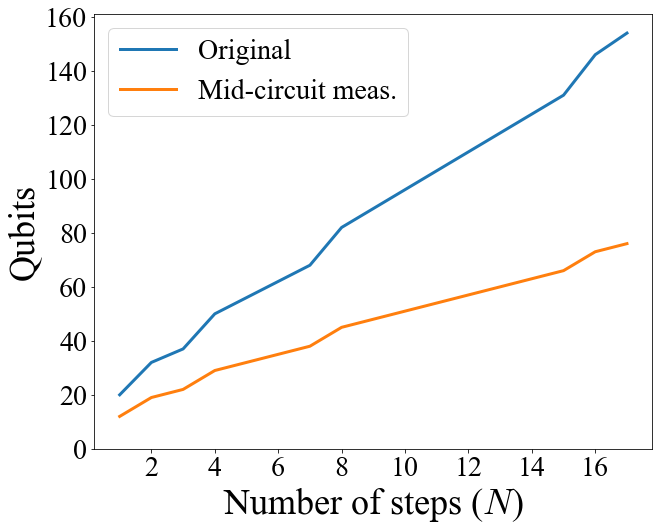

In [8]:
ni= 1

Nmax= 17
old_qubits= np.arange(Nmax)
old_qubits2= np.arange(Nmax)
new_qubits= np.arange(Nmax)

for N in range(1, Nmax+1):
    print('\n N: %d' %(N))
    print('old: ' + str(qubit_count_old(N, ni)))
    print('old2: ' + str(qubit_count_old2(N, ni)))
    print('new: ' + str(qubit_count_new(N, ni)))
    old_qubits[N-1]= qubit_count_old(N, ni)
    new_qubits[N-1]= qubit_count_new(N, ni)
    old_qubits2[N-1]= qubit_count_old2(N, ni)

    qc1= qps.QuantumPartonShower(N, 1)
    print(qc1._circuit.num_qubits)
    

plt.figure(figsize=(10, 8))
plt.rcParams['mathtext.fontset'] = 'cm'

#plt.plot(np.arange(1, Nmax+1, 1), old_qubits, linewidth= 3, label='Original_old')
plt.plot(np.arange(1, Nmax+1, 1), old_qubits2, linewidth= 3, label='Original')
plt.plot(np.arange(1, Nmax+1, 1), new_qubits, linewidth= 3, label='Mid-circuit meas.')
plt.legend(prop=matplotlib.font_manager.FontProperties(family='times new roman', size= 28))

plt.ylim(bottom=0)
plt.xlabel('Number of steps ($N$)', fontname= 'times new roman', fontsize= 36)
plt.ylabel('Qubits', fontname= 'times new roman', fontsize= 36)
plt.xticks(size= 28, fontname= 'times new roman')
plt.yticks(size= 28, fontname= 'times new roman')
#plt.title('Qubits', fontsize= 32, pad= 20)
plt.savefig('qubits_old_new.pdf')
plt.show()

In [20]:
def grayList(L):
    if L == 1:
        return np.ones(1)
    else:
        return np.concatenate((grayList(L-1), np.ones(1), 1 + grayList(L-1)), 0)

    
    
def gate_counter_TLCry(L, k):
    glk= grayList(L)[k-1]
    return 14 + 12*(2*glk - 1)*(L - 2) + 2*(glk - 1)
    
    
    

def gate_counter(n_i, N):
    count_uCount= 0
    count_Ue= 0
    count_Uh= 0
    count_Up= 0
    
    for m in range(0, N):
        
        #print('\n')
        #L= int(math.floor(math.log2(n_i + m)) + 1)
        L= int(math.ceil(math.log2(n_i + m + 1)))
        #print(L)
        
        nf= n_i + m - 1 + int(m % 2 == 0)
        #print(m, nf)
        #if m % 2 == 0:
        #    nf= n_i + m
        #else:
        #    nf= n_i + m - 1
        
        # uCount
        count_uCount+= (13*L)*(n_i + m)


        # Ue
        count_Ue+= (12*L - 10) * (nf + 1)
        #count_Ue+= (12*L - 10) * (nf)
        
        # Uh
        count_Uh+= 12*L - 11
        for k in range(1, n_i + m + 1):
            lk= int(math.ceil(math.log2(k + 1)))
            
            if k <= n_i:
                nf_lk= k
            else:
                nf_lk= k - int((k-n_i) % 2 != 0)

            # with reduced registers
            #count_Uh+= 13*lk + nf_lk*(120 + 12*lk + 3*gate_counter_TLCry(L, k))
            # with full L registers
            count_Uh+= 13*L + (nf_lk+1)*(120 + 12*L + 3*gate_counter_TLCry(L, k))

        
        count_Uh= int(count_Uh)


        # Up
        count_Up+= 2
        

    return count_uCount, count_Ue, count_Uh, count_Up

In [21]:
for j in range(1, 12):
    uC, Ue, Uh, Up= gate_counter(1, j)
    print(uC, Ue, Uh, Up, uC + Ue + Uh + Up)

13 4 290 2 309
65 32 1099 4 1200
143 88 2702 6 2939
299 192 6003 8 6502
494 348 11215 10 12067
728 504 18338 12 19582
1001 712 28620 14 30347
1417 1016 45153 16 47602
1885 1396 66058 18 69357
2405 1776 91335 20 95536
2977 2232 123648 22 128879


## Count gate costs of the new circuits (with remeasurement and actual number of c_if ops)

In [15]:
import QuantumPartonShower_clean_forGateCounting as qpsc_fgc

eps= 0.001
g_1= 2
g_2= 1
#g_12= 1
initialParticles= ['100'] # 1 a-fermion

#shots= 10000

N= 8

cx_fgc= np.zeros(N-1)
for n in range(1, N):
    qps_fgc= qpsc_fgc.QuantumPartonShower(n, 1)
    qc_fgc, qubits_fgc= qps_fgc.createCircuit(eps, g_1, g_2, 1, initialParticles)

    #qcT= compiler.transpile(qc, basis_gates=['u1', 'u2', 'u3', 'h', 'z', 'y', 'x', 'ry', 'rz', 'rx', 'cx'], optimization_level= 1)

    print('Qubits: ' + str(qc_fgc.num_qubits))
    print('Clbits: ' + str(qc_fgc.num_clbits))
    print('Gates: ' + str(qc_fgc.count_ops()))
    #print('Transpiled Gates: ' + str(qcT.count_ops()))
    #print(qcT.count_ops()['cx'])
    #cx_naive[n]= qcT.count_ops()['cx']
    ops= qc_fgc.count_ops()
    if 'ch' in ops:
        cx_fgc[n-1]= int(ops['cx'] + 6*ops['ccx'] + ops['ch'] + 2*ops['cry'])
    elif 'cry' in ops and 'cx' in ops:
        cx_fgc[n-1]= int(ops['cx'] + 6*ops['ccx'] + 2*ops['cry'])
    elif 'cx' in ops:
        cx_fgc[n-1]= int(ops['cx'] + 6*ops['ccx'])
    elif 'cry' in ops and 'ccx' in ops:
        cx_fgc[n-1]= int(6*ops['ccx'] + 2*ops['cry'])
    elif 'cry' in ops:
        cx_fgc[n-1]= int(2*ops['cry'])
    else:
        cx_fgc[n-1]= int(6*ops['ccx'])
    print(cx_fgc[n-1])



m= 0


Apply uCount()...
Apply uE()...
Apply U_h()...
max_na= 1
Incrementer l= 1
Measure and reset |h>...
Apply U_p()...
generated circuit on [QuantumRegister(6, 'p'), QuantumRegister(1, 'h'), QuantumRegister(1, 'w_h'), QuantumRegister(1, 'e'), QuantumRegister(3, 'w'), QuantumRegister(1, 'n_a'), QuantumRegister(1, 'w_a')] qubits
Qubits: 14
Clbits: 14
Gates: OrderedDict([('ccx', 46), ('x', 36), ('cry', 6), ('cx', 2)])
290.0


m= 0


Apply uCount()...
Apply uE()...
Apply U_h()...
max_na= 1
Incrementer l= 1
Measure and reset |h>...
Apply U_p()...


m= 1


Apply uCount()...
Apply uE()...
Apply U_h()...
max_na= 1
Incrementer l= 2
max_na= 1
Incrementer l= 2
Measure and reset |h>...
Apply U_p()...
generated circuit on [QuantumRegister(9, 'p'), QuantumRegister(2, 'h'), QuantumRegister(1, 'w_h'), QuantumRegister(1, 'e'), QuantumRegister(3, 'w'), QuantumRegister(2, 'n_a'), QuantumRegister(1, 'w_a')] qubits
Qubits: 19
Clbits: 21
Gates: OrderedDict([('ccx', 176), ('x', 143), ('cry', 18), ('cx', 

In [92]:
for c in cx_fgc:
    print(c)
    
#qc_fgc.draw()

#290
#1099
#2702
#6003
#11215
#718338
#28620


290.0
1099.0
2702.0
6003.0
11215.0
18338.0
28620.0


309.0
1200.0
2939.0
6502.0
12067.0
19582.0
30347.0
47602.0
69357.0
95536.0
128879.0
167510.0
214469.0
269680.0
336783.0
uCount slope: 2.25183
Ue slope: 2.58265
Uh slope: 2.59472
Up slope: 1.00000
Total slope: 2.58262
No remeasurement slope: 3.30776
[9.360000e+02 6.803000e+03 2.074100e+04 6.118600e+04 1.332800e+05
 2.525110e+05 4.391510e+05 8.085200e+05 1.341774e+06]


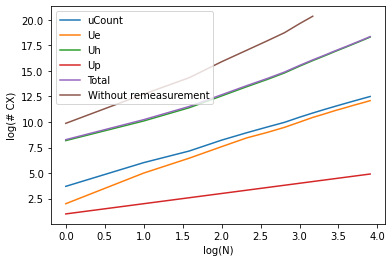

In [19]:
N= 16
Narray= np.arange(1, N)
uCount= np.zeros(N-1)
Ue= np.zeros(N-1)
Uh= np.zeros(N-1)
Up= np.zeros(N-1)

for j in range(1, N):
    uCount[j-1], Ue[j-1], Uh[j-1], Up[j-1]= gate_counter(1, j)
    
total= uCount + Ue + Uh + Up
for t in total:
    print(t)

plt.plot(np.log2(Narray), np.log2(uCount), label='uCount')
plt.plot(np.log2(Narray), np.log2(Ue), label='Ue')
plt.plot(np.log2(Narray), np.log2(Uh), label='Uh')
plt.plot(np.log2(Narray), np.log2(Up), label='Up')
plt.plot(np.log2(Narray), np.log2(total), label='Total')
plt.plot(np.log2(Narray[:9]), np.log2(cx_naive[:9]), label='Without remeasurement')

dx= (np.log2(Narray)[-1] - np.log2(Narray)[0])
print('uCount slope: %.5f' %((np.log2(uCount)[-1] - np.log2(uCount)[0]) / dx))
print('Ue slope: %.5f' %((np.log2(Ue)[-1] - np.log2(Ue)[0]) / (np.log2(Narray)[-1] - np.log2(Narray)[0])))
print('Uh slope: %.5f' %((np.log2(Uh)[-1] - np.log2(Uh)[0]) / dx))
print('Up slope: %.5f' %((np.log2(Up)[-1] - np.log2(Up)[0]) / dx))
print('Total slope: %.5f' %((np.log2(total)[-1] - np.log2(total)[0]) / dx))
print('No remeasurement slope: %.5f' %((np.log2(cx_naive)[8] - np.log2(cx_naive)[0]) / np.log2(Narray)[8] - np.log2(Narray)[0]))

plt.xlabel('log(N)')
plt.ylabel('log(# CX)')
plt.legend()

print(cx_naive)

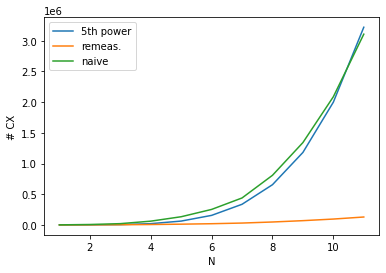

In [25]:
# Total gates counts:
N= 16
Narray= np.arange(1, N)
uCount= np.zeros(N-1)
Ue= np.zeros(N-1)
Uh= np.zeros(N-1)
Up= np.zeros(N-1)

for j in range(1, N):
    uCount[j-1], Ue[j-1], Uh[j-1], Up[j-1]= gate_counter(1, j)

total= uCount + Ue + Uh + Up

z= 11

plt.plot(Narray[:z], 20*Narray[:z]**5, label='5th power')
plt.plot(Narray[:z], total[:z], label='remeas.')
plt.plot(Narray[:z], cx_naive[:z], label='naive')
plt.xlabel('N')
plt.ylabel('# CX')
plt.legend()

In [1]:
# Total log gates counts:

for j in range(1, N):
    uCount[j-1], Ue[j-1], Uh[j-1], Up[j-1]= gate_counter(1, j)

total= uCount + Ue + Uh + Up

plt.plot(np.log2(Narray[:z]), np.log2(cx_naive[:z]), label='Original')
plt.plot(np.log2(Narray[:z]), np.log2(total[:z]), label='Mid-circuit meas.')
plt.plot(np.log2(Narray[:z]), np.log2(Uh[:z]), label=r'Mid-circuit meas. $U_h$')
plt.xlabel('log(N)')
plt.ylabel('log(# CX)')
plt.legend()
#plt.savefig('gate_count_prototype.pdf')

NameError: name 'N' is not defined

## Fitting

In [23]:
N=16

import scipy.optimize as so

def f(x, a, b, c, d, e, f, g, h):
    return x * (a * x**2 * np.log2(x)**2 + b * x * np.log2(x)**2 + c * x**2 * np.log2(x) + d * x**2 + e * x * np.log2(x) + f * x + g * np.log2(x) + h)

def g(x, a, b, c, d):
    return x * (a * x**2 * np.log2(x)**2 + b * x * np.log2(x)**2 + c * x**2 * np.log2(x) + d)

def g2(x, a, b, c):
    return x * (a * x**b * np.log2(x)**c)


def f2(x, a, b, c, d):
    return a*x**3 + b*x**2 + c*x + d

def f_linear(x, a, b):
    return a*x + b
    

logNarray= np.log2(Narray)
logtotal= np.log2(total)
lognaive= np.log2(cx_naive)

popt, pcov= so.curve_fit(f, Narray, total)
print('popt: ' + str(popt) + '\n')
print('stddev: ' + str(np.sqrt(np.diag(pcov))) + '\n')

poptG, pcovG= so.curve_fit(g, Narray, total)
print('poptG: ' + str(poptG) + '\n')
print('stddevG: ' + str(np.sqrt(np.diag(pcovG))) + '\n')

#poptG2, pcovG2= so.curve_fit(g2, Narray, total, bounds=[[0, 1, 1], [np.inf, np.inf, np.inf]])
poptG2, pcovG2= so.curve_fit(g2, Narray, total)
print('poptG2: ' + str(poptG2) + '\n')
print('stddevG2: ' + str(np.sqrt(np.diag(pcovG2))) + '\n')

poptG2X, pcovG2X= so.curve_fit(g2, Narray[:9], cx_naive)
print('poptG2X: ' + str(poptG2X) + '\n')
print('stddevG2X: ' + str(np.sqrt(np.diag(pcovG2X))) + '\n')

popt2, pcov2= so.curve_fit(f2, Narray, total)
print('popt2: ' + str(popt2) + '\n')
print('stddev2: ' + str(np.sqrt(np.diag(pcov2))) + '\n')

popt3, pcov3= so.curve_fit(f3, Narray, total)
print('popt3: ' + str(popt3) + '\n')
print('stddev3: ' + str(np.sqrt(np.diag(pcov3))) + '\n')


poly= np.polynomial.polynomial.Polynomial.fit(Narray, total, 3, full=True)
print(poly)
#print(poly.coef)


p = np.polynomial.polynomial.Polynomial.fit(Narray, total, 3, full=False)
#plt.plot(*p.linspace())
p2= p.convert().coef
print('Cubic fit: ' + str(p2))

plt.figure()
plt.plot(Narray, total, label='emp.')
plt.plot(Narray, Narray**3*p2[3] + Narray**2*p2[2] + Narray*p2[1] + np.ones(N-1)*p2[0], label='cubic fit')
plt.plot(Narray, f(Narray, popt[0], popt[1], popt[2], popt[3], popt[4], popt[5], popt[6], popt[7]), label='scipy (all terms)')
plt.plot(Narray, g(Narray, poptG[0], poptG[1], poptG[2], poptG[3]), label='scipy (reduced terms)')
plt.plot(Narray, g2(Narray, poptG2[0], poptG2[1], poptG2[2]), label='scipy (reduced terms 2)')
plt.plot(Narray[:9], g2(Narray[:9], poptG2X[0], poptG2X[1], poptG2X[2]), label='scipy (reduced terms 2) naive data')
plt.plot(Narray, f2(Narray, popt2[0], popt2[1], popt2[2], popt2[3]), label='scipy (cubic fit)')
#plt.plot(Narray, f_linear(Narray, popt3[0], popt3[1]), label='scipy3')
#plt.plot(Narray, f(Narray, 72/3, 72/3, -30/3, 126/3, 24/3, 19/3, 66/3, 133/3), label='analytical upper bound')

plt.xlabel('N')
plt.ylabel('# CX')
plt.legend()
plt.show()

plt.figure()
plt.plot(logNarray, np.log2(total), label='emp.')
plt.plot(logNarray, np.log2(Narray**3*p2[3] + Narray**2*p2[2] + Narray*p2[1] + np.ones(N-1)*p2[0]), label='cubic fit')
plt.plot(logNarray, np.log2(f(Narray, popt[0], popt[1], popt[2], popt[3], popt[4], popt[5], popt[6], popt[7])), label='scipy (all terms)')
plt.plot(logNarray, np.log2(f2(Narray, popt2[0], popt2[1], popt2[2], popt2[3])), label='scipy (cubic fit)')
plt.plot(logNarray, np.log2(f(Narray, 72/3, 72/3, -30/3, 126/3, 24/3, 19/3, 66/3, 133/3)), label='analytical upper bound')

plt.xlabel('N')
plt.ylabel('# CX')
plt.legend()
plt.show()

popt: [   11792.71085042  -225280.7656145   -191681.85876987   861657.26333921
   319251.49181301 -2387742.73175843   334628.19637414  1526405.61458055]

stddev: [   5918.51976837  133981.51753951   98909.8971547   455016.56501837
  261213.24129033 1480881.79216045  238917.35160929 1027685.09383123]

poptG: [  5.38285795  76.45053022 -15.96648155 448.18369707]

stddevG: [  8.06060972  68.21163816  49.11910817 139.67868265]

poptG2: [7.40522056e+01 2.10899640e+00 3.55737212e-08]

stddevG2: [2.42120778 0.01162075 0.01415502]

poptG2X: [1.18902617e+02 3.24536449e+00 1.37797675e-07]

stddevG2X: [36.79042164  0.13785797  0.40086839]

popt2: [ 114.52179784 -292.38726297 1040.81873511 -579.32883339]

stddev2: [   3.30502609   80.2710284   561.9835616  1072.86641683]



<ipython-input-23-c0aa93f29118>:12: RuntimeWarning: divide by zero encountered in power
  return x * (a * x**b * np.log2(x)**c)


NameError: name 'f3' is not defined

## Do a linear with to the logarithm vs. logarithm

popt: [2.67752798 7.61526781]

stddev: [[1.63631537 0.        ]
 [0.         2.75957747]]

popt: [3.30714933 9.49537003]

stddev: [[1.81855694 0.        ]
 [0.         3.08145583]]


popt: [2.86425354e+00 2.06886728e-19 1.30830842e+02]

stddev: [ 0.24397662  0.38376222 17.87682115]

popt: [3.53047408e+00 1.17092316e-14 4.88738477e+02]

stddev: [  0.6295035    0.83622609 187.88451377]



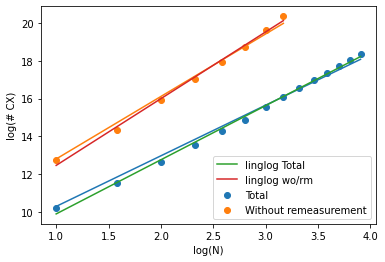

In [24]:
N=10

def linlog(x, a, b, c):
    return a*x + b*np.log2(x) + np.log2(c)


plog, _ = so.curve_fit(f_linear, logNarray, logtotal)
print('popt: ' + str(plog) + '\n')
print('stddev: ' + str(np.sqrt(np.diag(plog))) + '\n')

plog2, _ = so.curve_fit(f_linear, logNarray[:N-1], lognaive)
print('popt: ' + str(plog2) + '\n')
print('stddev: ' + str(np.sqrt(np.diag(plog2))) + '\n')

plogX, pcovX = so.curve_fit(linlog, logNarray[1:], logtotal[1:], bounds=[0, np.inf])
plog2X, pcov2X = so.curve_fit(linlog, logNarray[1:N-1], lognaive[1:], bounds=[0, np.inf])
print()
print('popt: ' + str(plogX) + '\n')
print('stddev: ' + str(np.sqrt(np.diag(pcovX))) + '\n')
print('popt: ' + str(plog2X) + '\n')
print('stddev: ' + str(np.sqrt(np.diag(pcov2X))) + '\n')


plt.scatter(logNarray[1:], logtotal[1:], label='Total')
plt.scatter(logNarray[1:N-1], lognaive[1:N-1], label='Without remeasurement')
plt.plot(logNarray[1:], f_linear(logNarray[1:], plog[0], plog[1]))
plt.plot(logNarray[1:N-1], f_linear(logNarray[1:N-1], plog2[0], plog2[1]))

plt.plot(logNarray[1:], linlog(logNarray[1:], plogX[0], plogX[1], plogX[2]), label='linglog Total')
plt.plot(logNarray[1:N-1], linlog(logNarray[1:N-1], plog2X[0], plog2X[1], plog2X[2]), label='linglog wo/rm')


plt.xlabel('log(N)')
plt.ylabel('log(# CX)')
plt.legend()

## Plot the linlog fit on raw dat

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[2.04000e+02 7.46000e+02 2.67400e+03 6.17600e+03 1.33680e+04 2.22660e+04
 3.72720e+04 5.91680e+04 9.10060e+04 1.26962e+05 1.77102e+05 2.32224e+05
 3.04722e+05 3.85016e+05 4.88428e+05]
[6.89273992e+00 5.57099615e+01 1.89151719e+02 4.50270843e+02
 8.82341608e+02 1.52880206e+03 2.43322064e+03 3.63927431e+03
 5.19073302e+03 7.13144810e+03 9.50534331e+03 1.23564076e+04
 1.57286892e+04 1.96662909e+04 2.42133656e+04]


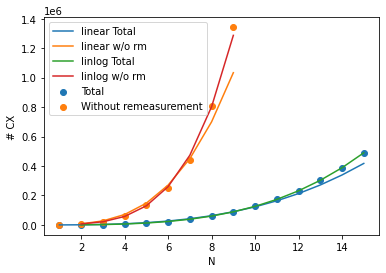

In [154]:
print(Narray)
print(total)
print(plog[1] * Narray ** plog[0])
plt.scatter(Narray, total, label='Total')
plt.scatter(Narray[:N-1], cx_naive[:N-1], label='Without remeasurement')
plt.plot(Narray, 2**plog[1] * Narray ** plog[0], label='linear Total')
plt.plot(Narray[1:N-1], 2**plog2[1] * Narray[1:N-1]**plog2[0], label='linear w/o rm')

plt.plot(Narray[1:], plogX[2] * np.log2(Narray[1:]) ** plogX[1] * Narray[1:] ** plogX[0], label='linlog Total')

N=10
plt.plot(Narray[1:N-1], plog2X[2] * np.log2(Narray[1:N-1]) ** plog2X[1] * Narray[1:N-1] ** plog2X[0], label='linlog w/o rm')


plt.xlabel('N')
plt.ylabel('# CX')
plt.legend()

# Simulate and get counts from original circuits (QuantumPartonShower.py)

In [46]:
import QuantumPartonShower as qpso

eps= 0.001
g_1= 2
g_2= 1
#g_12= 1
initialParticles= ['001'] # 1 a-fermion, old convention

shots= 100000
N= 2

print('Beginning...')
qps2= qpso.QuantumPartonShower(N, 1) # newest remeasurement
qc2, qubits2= qps2.createCircuit(eps, g_1, g_2, 1, initialParticles)

qps3= qpso.QuantumPartonShower(N, 1) # newest remeasurement
qc3, qubits3= qps3.createCircuit(eps, g_1, g_2, 0, initialParticles)
print('Qubits: ' + str(qc2.num_qubits))
print('Clbits: ' + str(qc2.num_clbits))
print('Gates: ' + str(qc2.count_ops()))

t1= time.time()
counts= qps2.simulate('qasm', shots=shots, position=False)
print('g= 1 finished.')
t2= time.time()
counts2= qps3.simulate('qasm', shots=shots, position=False)
t3= time.time()
print('g= 0 finished.\n')

print('N= %d' %(N))
print('\nSimulation g12= 1: %.6f' %(t2 - t1))
print('Simulation g12= 0: %.6f\n\n' %(t3 - t2))

print(counts)

np.save('counts_OLD_%dstep_g12=1_shots=%d.npy' %(N, shots), counts)
np.save('counts_OLD_%dstep_g12=0_shots=%d.npy' %(N, shots), counts2)

Beginning...
ga= 2.6180, gb= 0.3820, u= 0.5257

m=0, Length of countsList= 3

m= 0
k:  0

m=1, Length of countsList= 9

m= 1
k:  0
k:  1
generated circuit on 11 qubits
ga= 2.0000, gb= 1.0000, u= 0.0000

m=0, Length of countsList= 3

m= 0
k:  0

m=1, Length of countsList= 9

m= 1
k:  0
k:  1
generated circuit on 11 qubits
Qubits: 33
Clbits: 0
Gates: OrderedDict([('ccx', 1105), ('x', 973), ('cry', 75), ('cx', 20), ('ch', 3)])
g= 1 finished.
g= 0 finished.

N= 2

Simulation g12= 1: 6.033888
Simulation g12= 0: 5.487190


{'00 00 00 00 00 00 00 0 00 01 000 001 101 00000': 66, '00 00 00 00 00 00 00 0 10 01 111 101 101 00000': 319, '00 00 00 00 00 00 00 0 10 01 100 111 101 00000': 296, '00 00 00 00 00 00 00 0 10 01 111 100 101 00000': 306, '00 00 00 00 00 00 00 0 10 01 111 100 100 00000': 1883, '00 00 00 00 00 00 00 0 10 01 101 111 100 00000': 1923, '00 00 00 00 00 00 00 0 10 01 101 110 101 00000': 308, '00 00 00 00 00 00 00 0 10 01 101 110 100 00000': 1974, '00 00 00 00 00 00 00 0 01 00 001 

0 00 00 00 00 00 00 00 0 00 01 000 001 101 00000 0 phi f2 79
1 00 00 00 00 00 00 00 0 10 01 111 101 101 00000 af2 f2 f2 291
2 00 00 00 00 00 00 00 0 10 01 100 111 101 00000 f1 af2 f2 317
3 00 00 00 00 00 00 00 0 10 01 111 100 101 00000 af2 f1 f2 278
4 00 00 00 00 00 00 00 0 10 01 101 111 100 00000 f2 af2 f1 1961
5 00 00 00 00 00 00 00 0 10 01 111 100 100 00000 af2 f1 f1 2004
6 00 00 00 00 00 00 00 0 10 01 110 100 100 00000 af1 f1 f1 7629
7 00 00 00 00 00 00 00 0 10 01 100 111 100 00000 f1 af2 f1 1902
8 00 00 00 00 00 00 00 0 10 01 101 111 101 00000 f2 af2 f2 323
9 00 00 00 00 00 00 00 0 10 01 110 101 100 00000 af1 f2 f1 1936
10 00 00 00 00 00 00 00 0 00 00 000 000 100 00000 0 0 f1 13878
11 00 00 00 00 00 00 00 0 01 00 001 000 100 00000 phi 0 f1 9964
12 00 00 00 00 00 00 00 0 10 01 110 101 101 00000 af1 f2 f2 317
13 00 00 00 00 00 00 00 0 01 01 001 001 101 00000 phi phi f2 7582
14 00 00 00 00 00 00 00 0 00 00 000 000 101 00000 0 0 f2 12964
15 00 00 00 00 00 00 00 0 00 01 000 001 100 000

/Users/PDeliyannis/Documents/QubitResetDir/QuantumPartonShower/plotting.py:96: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.set_yscale("log", nonposy='clip')


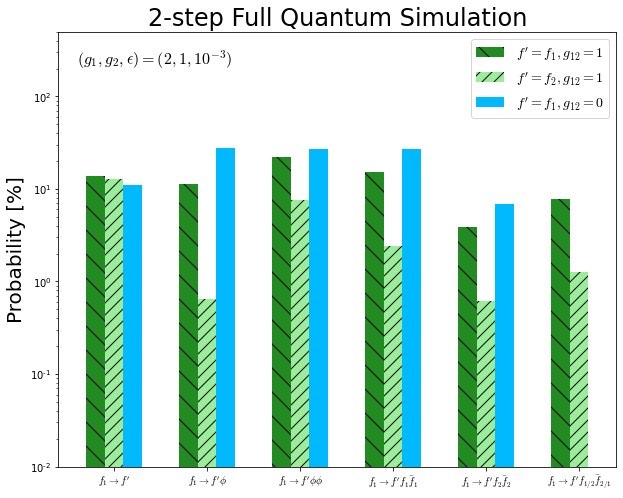

In [8]:
import plotting as pl

pl.bar_plot2(counts, shots, eps, g_1, g_2, counts2= counts2, save=False, wReg=True)

In [145]:
for c in counts:
    print(c, qps1.ptype(c.split()[11]), qps1.ptype(c.split()[12]), 
          qps1.ptype(c.split()[13]), qps1.ptype(c.split()[14]), counts[c])

000 000 000 000 000 000 000 0 000 010 001 000 111 100 101 00000 0 af2 f1 f2 1
000 000 000 000 000 000 000 0 000 010 001 000 101 110 101 00000 0 f2 af1 f2 1
000 000 000 000 000 000 000 0 000 010 001 000 100 110 101 00000 0 f1 af1 f2 2
000 000 000 000 000 000 000 0 011 001 000 101 111 000 101 00000 f2 af2 0 f2 6
000 000 000 000 000 000 000 0 010 000 001 111 000 101 100 00000 af2 0 f2 f1 11
000 000 000 000 000 000 000 0 010 000 001 100 000 110 101 00000 f1 0 af1 f2 4
000 000 000 000 000 000 000 0 000 010 001 000 111 101 101 00000 0 af2 f2 f2 1
000 000 000 000 000 000 000 0 010 000 001 101 000 110 101 00000 f2 0 af1 f2 1
000 000 000 000 000 000 000 0 000 010 001 000 100 111 100 00000 0 f1 af2 f1 2
000 000 000 000 000 000 000 0 010 000 001 110 000 101 100 00000 af1 0 f2 f1 15
000 000 000 000 000 000 000 0 000 000 001 000 000 001 100 00000 0 0 phi f1 24
000 000 000 000 000 000 000 0 011 010 001 001 101 111 101 00000 phi f2 af2 f2 6
000 000 000 000 000 000 000 0 000 010 001 000 111 101 100 00

## See if we can get information about classical gates from data --> looks like no.

In [143]:
data= qc.data

for j in range(len(data)):
#for j in range(10):
    for qubit in data[j][1]:
        if qubit.register.name == 'w_h':
            #print('\n')
            #print(data[j])
            print(data[j][0], qubit)

<qiskit.circuit.library.standard_gates.x.CCXGate object at 0x7fe31223f6d0> Qubit(QuantumRegister(3, 'w_h'), 0)
<qiskit.circuit.library.standard_gates.ry.CRYGate object at 0x7fe31223f700> Qubit(QuantumRegister(3, 'w_h'), 0)
<qiskit.circuit.library.standard_gates.x.CCXGate object at 0x7fe31223fc70> Qubit(QuantumRegister(3, 'w_h'), 0)
<qiskit.circuit.library.standard_gates.x.CCXGate object at 0x7fe311e21850> Qubit(QuantumRegister(3, 'w_h'), 0)
<qiskit.circuit.library.standard_gates.ry.CRYGate object at 0x7fe311e218e0> Qubit(QuantumRegister(3, 'w_h'), 0)
<qiskit.circuit.library.standard_gates.x.CCXGate object at 0x7fe311e21940> Qubit(QuantumRegister(3, 'w_h'), 0)
<qiskit.circuit.library.standard_gates.x.CCXGate object at 0x7fe311e21b80> Qubit(QuantumRegister(3, 'w_h'), 0)
<qiskit.circuit.library.standard_gates.ry.CRYGate object at 0x7fe311e21c10> Qubit(QuantumRegister(3, 'w_h'), 0)
<qiskit.circuit.library.standard_gates.x.CCXGate object at 0x7fe311e21c70> Qubit(QuantumRegister(3, 'w_h'), 0

<ipython-input-143-9eea645ec832>:6: DeprecationWarning: Back-references to from Bit instances to their containing Registers have been deprecated. Instead, inspect Registers to find their contained Bits.
  if qubit.register.name == 'w_h':


## Test the newest, simplified circuit with remeasurement. Using matrix_product_state simulation method, we can stimulate 4-5 steps no problem, although the simulation still uses exponential resources.

In [ ]:
import QuantumPartonShower_clean as qpsc

eps= 0.001
g_1= 2
g_2= 1
#g_12= 1
initialParticles= ['100'] # 1 a-fermion
na_i= 1
nb_i= 0
#initialParticles= ['001'] # 1 a-fermion, old convention

shots= 100000
N= 3

print('Beginning...')
qps2= qpsc.QuantumPartonShower(N, 1) # newest remeasurement
#qps2= qps.QuantumPartonShower(N, 1) # without remeasurement
qc2, qubits2= qps2.createCircuit(eps, g_1, g_2, 1, initialParticles)
print('g= 1 finished.')

qps3= qpsc.QuantumPartonShower(N, 1) # newest remeasurement
#qps3= qps.QuantumPartonShower(N, 1) # without remeasurement
qc3, qubits3= qps3.createCircuit(eps, g_1, g_2, 0, initialParticles)

print('Qubits: ' + str(qc2.num_qubits))
print('Clbits: ' + str(qc2.num_clbits))
print('Gates: ' + str(qc2.count_ops()))

t1= time.time()
counts= qps2.simulate('qasm', shots=shots, position=False)
t2= time.time()
counts2= qps3.simulate('qasm', shots=shots, position=False)
t3= time.time()
print(counts)

print('\nSimulation g12= 1: %.6f' %(t2 - t1))
print('Simulation g12= 0: %.6f\n\n' %(t3 - t2))

#np.save('counts_%dstep_g12=1_shots=%d.npy' %(N, shots), counts)
#np.save('counts_%dstep_g12=0_shots=%d.npy' %(N, shots), counts2)

Beginning...


m= 0


Apply uCount()...
Apply uE()...
Apply U_h()...
Measure and reset |h>...
Apply U_p()...


m= 1


Apply uCount()...
Apply uE()...
Apply U_h()...
Measure and reset |h>...
Apply U_p()...


m= 2


Apply uCount()...
Apply uE()...
Apply U_h()...
Measure and reset |h>...
Apply U_p()...
generated circuit on [QuantumRegister(12, 'p'), QuantumRegister(2, 'h'), QuantumRegister(1, 'w_h'), QuantumRegister(1, 'e'), QuantumRegister(3, 'w'), QuantumRegister(2, 'n_a'), QuantumRegister(1, 'w_a')] qubits
g= 1 finished.


m= 0


Apply uCount()...
Apply uE()...
Apply U_h()...
Measure and reset |h>...
Apply U_p()...


m= 1


Apply uCount()...
Apply uE()...
Apply U_h()...
Measure and reset |h>...
Apply U_p()...


m= 2


Apply uCount()...
Apply uE()...
Apply U_h()...
Measure and reset |h>...
Apply U_p()...
generated circuit on [QuantumRegister(12, 'p'), QuantumRegister(2, 'h'), QuantumRegister(1, 'w_h'), QuantumRegister(1, 'e'), QuantumRegister(3, 'w'), QuantumRegister(2, 'n_a'), QuantumR

In [4]:
np.save('counts_%dstep_g12=1_shots=%d.npy' %(N, shots), counts)
np.save('counts_%dstep_g12=0_shots=%d.npy' %(N, shots), counts2)

## Generate MCMC data (emissions) and compute hardest emission analytically (log theta max) for g_12 = 0

In [4]:
import QuantumPartonShower_ReM_2step_hardcode as qps_rhs

N= 2
eps= 0.001
qps3= qps_rhs.QuantumPartonShower(N, 1)
circ= qps3.createCircuit(eps, 2, 1, 0, ['100'], verbose=True)

mcmc_shots= int(1e1)
na_i= 1
nb_i= 0

emits= np.zeros(N+1)
for j in range(mcmc_shots):
    n_emits, n_a, n_b, n_phi= qps3.MCMC(eps, g_1, g_2, na_i, nb_i, verbose=False)
    emits[n_emits]+= 1
    
emits/= mcmc_shots
#np.save('mcmc_%dstep_na=%d_nb=%d_shots=%s.npy' %(N, na_i, nb_i, '{:.0e}'.format(mcmc_shots)), emits)


if na_i == 1:
    gL= g_1
if nb_i == 1:
    gL= g_2


# TODO: Need to make the steps uniform in log(θ)
n_analytical = 10000
#n_analytical = 2

# The following two lines are the same
lnxList = [math.log(eps**((i+0.5) / n_analytical)) for i in range(0, n_analytical)]
#lnxList = [math.log(eps**((i) / n_analytical))+(math.log(eps**((i+1) / n_analytical))-math.log(eps**((i) / n_analytical)))/2. for i in range(0, n_analytical)]
yLList = [qps3.dsigma_d_t_max(lnx, math.log(eps)/N, gL, normalized=False) for lnx in lnxList]
#print(lnxList)

print(np.sum(yLList[:int(n_analytical/2)]) * math.log(eps**(-1 / n_analytical)))
print(np.sum(yLList[int(n_analytical/2):]) * math.log(eps**(-1 / n_analytical)))

np.savez('thetamax_analytical_N=%d_points=%d' %(N, n_analytical), lnxList, yLList)

#print(np.array(yLList[0:10]))
print('Done.')



g_a= 2.0000, g_b= 1.0000, u= 0.0000
Delta_aList: [0.3330697343979015, 0.3330697343979015]
Delta_bList: [0.7596854221754138, 0.7596854221754138]
Delta_phiList: [0.25302822178992274, 0.2530282217899227]
P_aList: [-0.5497016991595708, -1.6491050974787125]
P_bList: [-0.1374254247898927, -0.4122762743696781]
P_phiList: [-0.6871271239494635, -2.0613813718483907]
timeStepList: [0.1778279410038923, 0.005623413251903491]
Applying step 1.
Apply uE()...
	 DeltaA: 0.3330697343979015
	 DeltaB: 0.7596854221754138
Measure and Reset |e>...
Apply U_h()...
Measure and reset |h>...
Apply U_p()...

Applying step 2.
Apply uE()...
	 DeltaAphi: 0.08427604262674286
	 DeltaBphi: 0.19222185149277166
	 DeltaA: 0.3330697343979015
	 DeltaB: 0.7596854221754138
Measure and reset |e>...
Apply U_h()...
Apply U_p()...
Done.
0.6669302642585925
0.22213428597853166
Done.


## Use this cell for Old circuit plots

/Users/PDeliyannis/Documents/QubitResetDir/QuantumPartonShower/plotting.py:667: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax1.set_xticks(x_axis, 1)
/Users/PDeliyannis/Documents/QubitResetDir/QuantumPartonShower/plotting.py:668: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['']*len(x_axis))
/Users/PDeliyannis/Documents/QubitResetDir/QuantumPartonShower/plotting.py:756: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax2.set_xticks(x_axis, 1)
/Users/PDeliyannis/Documents/QubitResetDir/QuantumPartonShower/plotting.py:757: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(x_axis-1, size=22, fontname= 'times ne

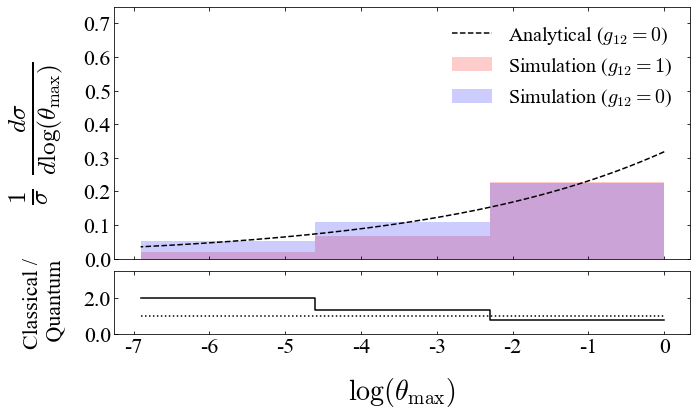

In [17]:
eps= 0.001
g_1= 2
g_2= 1
#g_12= 1
initialParticles= ['100'] # 1 a-fermion

N= 3
shots= 1e5

mcmc_shots= 1e5
n_analytical= 1e6
na_i= 1
nb_i= 0

#counts= np.load('counts_%dstep_g12=1_shots=%d.npy' %(N, shots), allow_pickle='TRUE').item()
#counts2= np.load('counts_%dstep_g12=0_shots=%d.npy' %(N, shots), allow_pickle='TRUE').item()
counts= np.load('counts_OLD_%dstep_g12=1_shots=%d.npy' %(N, shots), allow_pickle='TRUE').item()
counts2= np.load('counts_OLD_%dstep_g12=0_shots=%d.npy' %(N, shots), allow_pickle='TRUE').item()
mcmc= np.load('mcmc_%dstep_na=%d_nb=%d_shots=%s.npy' %(N, na_i, nb_i, '{:.0e}'.format(mcmc_shots)))

npzfile = np.load('thetamax_analytical_N=%d_shots=%s.npz' %(N, '{:.0e}'.format(n_analytical)))
print(npzfile)
ax= npzfile['arr_0']
ay= npzfile['arr_1']

#print(mcmc)
#print(ax, ay)
#print(counts)
#print(counts2)
#qps2.bar_plot2(counts, shots, eps, g_1, g_2, counts2= counts2)
#qps2.bar_plot_emissions(counts, shots, eps, g_1, g_2, N, counts2= counts2)
#qps2.bar_plot_thetamax(counts, shots, eps, g_1, g_2, N, counts2= counts2)
#qps2.bar_plot3(counts, shots, eps, g_1, g_2, initialParticles, counts2= counts2)
#pl.bar_plot2(counts, shots, eps, g_1, g_2, counts2= counts2, save=False, wReg=True)
#pl.bar_plot3(counts, shots, eps, g_1, g_2, initialParticles, counts2= counts2, save=True)
#pl.bar_plot_thetamax(counts, shots, eps, g_1, g_2, N, 1, counts2= counts2, save=False)
#pl.bar_plot_emissions(counts, shots, eps, g_1, g_2, N, 1, counts2= counts2, save=False)
#pl.master_plot_nophisplit(g_1, g_2, N, 1, shots, counts, counts2)
#pl.master_plot_phisplit_emissions(g_1, g_2, N, 1, shots, counts, counts2, mcmc=mcmc, save=False)
#pl.master_plot_phisplit_emissions(g_1, g_2, N, 1, shots, counts, counts2, mcmc=mcmc, save=True)
pl.master_plot_phisplit_thetamax(g_1, g_2, N, 1, shots, counts, counts2, analytical= (ax, ay), save=False, normalized=True)
#pl.master_plot_phisplit_thetamax(g_1, g_2, N, 1, shots, counts, counts2, analytical= (ax, ay), save=True)

#np.save('', counts)
#np.save('counts_%dstep_g12=1.npy' %(N), counts)
#np.save('counts_%dstep_g12=0.npy' %(N), counts2)


#read_dictionary = np.load('counts_%dstep_g12=1.npy' %(N), allow_pickle='TRUE').item()
#print(read_dictionary) # displays "world"

#cload= np.load('counts_%dstep_g12=1.npy' %(N), allow_pickle='TRUE').item()
#cload2= np.load('counts_%dstep_g12=0.npy' %(N), allow_pickle='TRUE').item()
#qps2.bar_plot3(cload, shots, eps, g_1, g_2, initialParticles, counts2= cload2)

## Use the cell below for new circuit (mid-circuit measurements) plots

[-6.21697975 -4.8354287  -3.45387764 -2.07232658 -0.69077553]
[-7 -6 -5 -4 -3 -2 -1  0]
0 2000
2000 4000
4000 6000
6000 8000
0.0014073372727338163


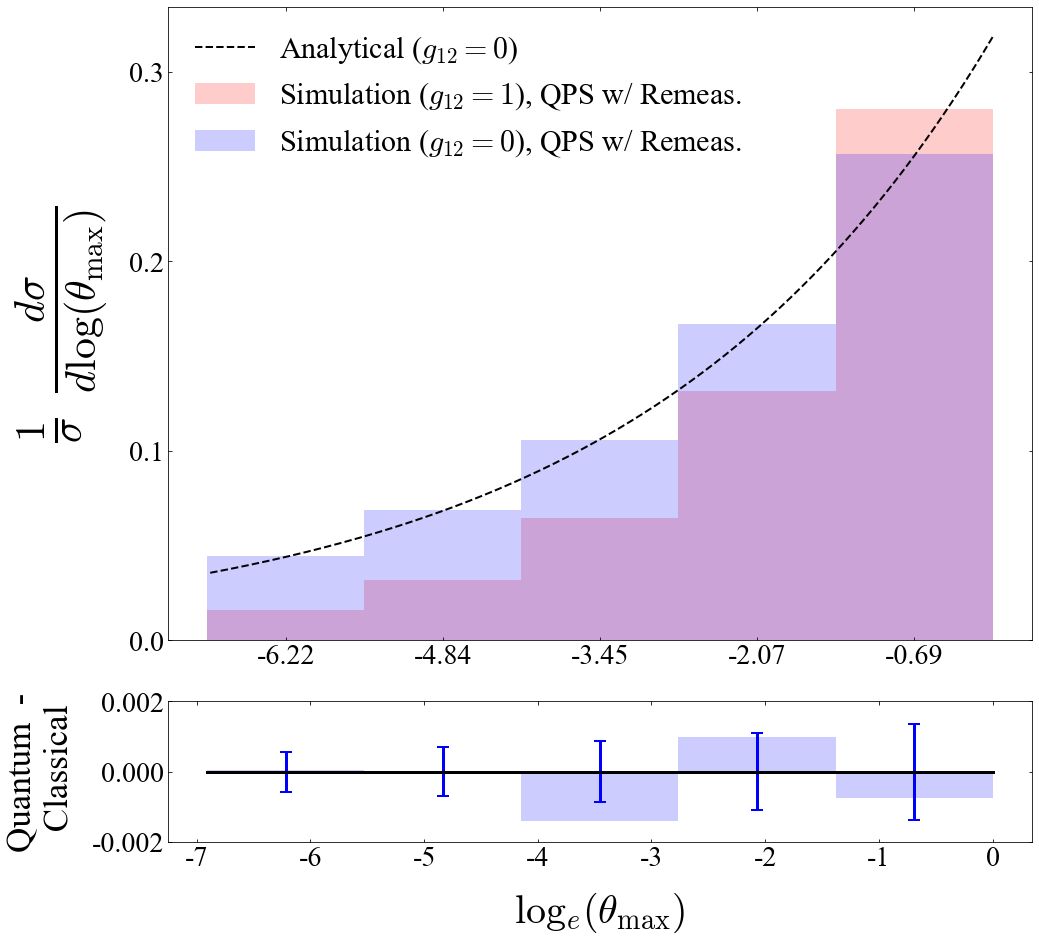

In [190]:
import plotting_new as pl2

eps= 0.001
g_1= 2
g_2= 1
#g_12= 1
initialParticles= ['100'] # 1 a-fermion

N= 5
shots= 100000
n_analytical= 10000

mcmc_shots= 1000000
#n_analytical= 10000
na_i= 1
nb_i= 0

counts= np.load('counts_%dstep_g12=1_shots=%d.npy' %(N, shots), allow_pickle='TRUE').item()
counts2= np.load('counts_%dstep_g12=0_shots=%d.npy' %(N, shots), allow_pickle='TRUE').item()
mcmc= np.load('mcmc_%dstep_na=%d_nb=%d_shots=%s.npy' %(N, na_i, nb_i, '{:.0e}'.format(mcmc_shots)))

if N < 5:
    countsOld= np.load('counts_OLD_%dstep_g12=1_shots=%d.npy' %(N, shots), allow_pickle='TRUE').item()
    countsOld2= np.load('counts_OLD_%dstep_g12=0_shots=%d.npy' %(N, shots), allow_pickle='TRUE').item()
    countsTup= countsOld, countsOld2
else:
    countsTup=None
    
npzfile = np.load('thetamax_analytical_N=%d_points=%s.npz' %(N, '{:.0e}'.format(n_analytical)))
print(npzfile)
ax= npzfile['arr_0']
ay= npzfile['arr_1']

#print(mcmc)
#print(ax, ay)
#print(counts)
#print(counts2)
#qps2.bar_plot2(counts, shots, eps, g_1, g_2, counts2= counts2)
#qps2.bar_plot_emissions(counts, shots, eps, g_1, g_2, N, counts2= counts2)
#qps2.bar_plot_thetamax(counts, shots, eps, g_1, g_2, N, counts2= counts2)
#qps2.bar_plot3(counts, shots, eps, g_1, g_2, initialParticles, counts2= counts2)
#pl.bar_plot2(counts, shots, eps, g_1, g_2, counts2= counts2, save=False, wReg=True)
#pl.bar_plot3(counts, shots, eps, g_1, g_2, initialParticles, counts2= counts2, save=True)
#pl.bar_plot_thetamax(counts, shots, eps, g_1, g_2, N, 1, counts2= counts2, save=False)
#pl.bar_plot_emissions(counts, shots, eps, g_1, g_2, N, 1, counts2= counts2, save=False)
#pl.master_plot_nophisplit(g_1, g_2, N, 1, shots, counts, counts2)
#pl2.master_plot_phisplit_emissions(g_1, g_2, N, 1, shots, counts, counts2, mcmc=mcmc, save=True, old_alg=countsTup)
#pl.master_plot_phisplit_emissions(g_1, g_2, N, 1, shots, counts, counts2, mcmc=mcmc, save=True)
#pl.master_plot_phisplit_thetamax(g_1, g_2, N, 1, shots, counts, counts2, analytical= (ax, ay), save=False, normalized=True)
#pl.master_plot_phisplit_thetamax(g_1, g_2, N, 1, shots, counts, counts2, analytical= (ax, ay), save=True)

#print(np.sum(ay)*(ax[1]-ax[0]))
pl2.master_plot_phisplit_thetamax(g_1, g_2, N, 1, shots, counts, counts2, analytical= (ax, ay), save=True, normalized=True, old_alg=None)

#np.save('', counts)
#np.save('counts_%dstep_g12=1.npy' %(N), counts)
#np.save('counts_%dstep_g12=0.npy' %(N), counts2)


#read_dictionary = np.load('counts_%dstep_g12=1.npy' %(N), allow_pickle='TRUE').item()
#print(read_dictionary) # displays "world"

#cload= np.load('counts_%dstep_g12=1.npy' %(N), allow_pickle='TRUE').item()
#cload2= np.load('counts_%dstep_g12=0.npy' %(N), allow_pickle='TRUE').item()
#qps2.bar_plot3(cload, shots, eps, g_1, g_2, initialParticles, counts2= cload2)

## See which qubits are being used

In [79]:
data= qc2.data

for j in range(len(data)):
#for j in range(10):
    for qubit in data[j][1]:
        if qubit.register.name == 'w_h':
            #print('\n')
            #print(data[j][1])
            print(data[j][0], qubit)

<ipython-input-79-261f0b1f8543>:6: DeprecationWarning: Back-references to from Bit instances to their containing Registers have been deprecated. Instead, inspect Registers to find their contained Bits.
  if qubit.register.name == 'w_h':


<qiskit.circuit.library.standard_gates.x.CCXGate object at 0x7fcf409bfb20> Qubit(QuantumRegister(3, 'w_h'), 0)
<qiskit.circuit.library.standard_gates.ry.CRYGate object at 0x7fcf409bf3a0> Qubit(QuantumRegister(3, 'w_h'), 0)
<qiskit.circuit.library.standard_gates.x.CCXGate object at 0x7fcf409bf580> Qubit(QuantumRegister(3, 'w_h'), 0)
<qiskit.circuit.library.standard_gates.x.CCXGate object at 0x7fcf409bf070> Qubit(QuantumRegister(3, 'w_h'), 0)
<qiskit.circuit.library.standard_gates.ry.CRYGate object at 0x7fcf409bf760> Qubit(QuantumRegister(3, 'w_h'), 0)
<qiskit.circuit.library.standard_gates.x.CCXGate object at 0x7fcf409bfdc0> Qubit(QuantumRegister(3, 'w_h'), 0)
<qiskit.circuit.library.standard_gates.x.CCXGate object at 0x7fcf3fd4fcd0> Qubit(QuantumRegister(3, 'w_h'), 0)
<qiskit.circuit.library.standard_gates.ry.CRYGate object at 0x7fcf3fd4f040> Qubit(QuantumRegister(3, 'w_h'), 0)
<qiskit.circuit.library.standard_gates.x.CCXGate object at 0x7fcf3fd4ffa0> Qubit(QuantumRegister(3, 'w_h'), 0

<qiskit.circuit.library.standard_gates.ry.CRYGate object at 0x7fcf2aa97730> Qubit(QuantumRegister(3, 'w_h'), 1)
<qiskit.circuit.library.standard_gates.x.CCXGate object at 0x7fcf2aa97580> Qubit(QuantumRegister(3, 'w_h'), 0)
<qiskit.circuit.library.standard_gates.x.CCXGate object at 0x7fcf2aa97580> Qubit(QuantumRegister(3, 'w_h'), 1)
<qiskit.circuit.library.standard_gates.x.CCXGate object at 0x7fcf2aa97970> Qubit(QuantumRegister(3, 'w_h'), 0)
<qiskit.circuit.library.standard_gates.x.CCXGate object at 0x7fcf2aa97a00> Qubit(QuantumRegister(3, 'w_h'), 0)
<qiskit.circuit.library.standard_gates.x.CCXGate object at 0x7fcf2aa97a60> Qubit(QuantumRegister(3, 'w_h'), 0)
<qiskit.circuit.library.standard_gates.x.CCXGate object at 0x7fcf2aa97ac0> Qubit(QuantumRegister(3, 'w_h'), 0)
<qiskit.circuit.library.standard_gates.x.CCXGate object at 0x7fcf2aa97b20> Qubit(QuantumRegister(3, 'w_h'), 0)
<qiskit.circuit.library.standard_gates.x.CCXGate object at 0x7fcf3fdc2bb0> Qubit(QuantumRegister(3, 'w_h'), 0)


<qiskit.circuit.measure.Measure object at 0x7fcf3fa235b0> Qubit(QuantumRegister(3, 'w_h'), 1)
<qiskit.circuit.measure.Measure object at 0x7fcf3fa235b0> Qubit(QuantumRegister(3, 'w_h'), 2)


In [106]:
def generateParticleCounts(n_i, m, k):
    """Fill countsList with all combinations of n_phi, n_a, and n_b where each n lies in range [0, n_i+m-k],
    and the sum of all n's lies in range [n_i-k, m+n_i-k], all inclusive
    """
    countsList = []
    for numParticles in range(n_i - k, m + n_i - k + 1):
        for numPhi in range(0, n_i + m - k + 1):
            for numA in range(0, numParticles - numPhi + 1):
                numB = numParticles - numPhi - numA
                countsList.append([numPhi, numA, numB])
    return countsList

def exp_counts(m, n_i, k):
    
    if k <= n_i:
        n_i-= k
    else: 
        n_i-= k
    return (m+1) / 6 * (m**2 + 3*m*n_i + 5*m + 3*n_i**2 + 9*n_i + 6)

def exp_counts_paper(m, n_i, k):
    n_i-= k
    return (m+1) / 6 * (m**2 + 3*m*n_i + 5*m + 3*n_i**2 + 9*n_i + 6)

In [107]:
n_i= 3
N= 10
m= N - n_i
for k in range(0, N):
    print(n_i + m - k)
    pc= generateParticleCounts(n_i, m, k)
    #print(str(len(pc)) + ' -- ' + str(pc))
    print('actual: %d' %(len(pc)))
    print('exp: %d' %(exp_counts(m, n_i, k)))
    print('exp paper: %d' %(exp_counts_paper(m, n_i, k)))

10
actual: 276
exp: 276
exp paper: 276
9
actual: 216
exp: 216
exp paper: 216
8
actual: 164
exp: 164
exp paper: 164
7
actual: 120
exp: 120
exp paper: 120
6
actual: 84
exp: 84
exp paper: 84
5
actual: 56
exp: 56
exp paper: 56
4
actual: 35
exp: 36
exp paper: 36
3
actual: 20
exp: 24
exp paper: 24
2
actual: 10
exp: 20
exp paper: 20
1
actual: 4
exp: 24
exp paper: 24


# Hardcoded 2-step simulation with re-measurement

In [8]:
import QuantumPartonShower_ReM_hardcode_SIMPLIFIED_full_noNAreg as qps_rhs2


eps= 0.001
g_1= 2
g_2= 1
#g_12= 1
initialParticles= ['100'] # 1 a-fermion
#initialParticles= ['001'] # 1 a-fermion, old convention

shots= 10000
N= 1

#qpsS= qps_rhs2.QuantumPartonShower(N, 1)


#na_i= 1
#nb_i= 0

#qpsS.MCMC(eps, g_1, g_2, na_i, nb_i, verbose= True)

In [10]:
qpsS= qps_rhs2.QuantumPartonShower(N, 1)
qps2S= qps_rhs2.QuantumPartonShower(N, 1)

qcS, qubitsS= qpsS.createCircuit(eps, g_1, g_2, 1, initialParticles)
qc2S, qubits2S= qps2S.createCircuit(eps, g_1, g_2, 0, initialParticles)

qcT= compiler.transpile(qcS, basis_gates=['u1', 'u2', 'u3', 'h', 'z', 'y', 'x', 'ry', 'rz', 'rx', 'cx'], optimization_level= 2)
    
print('Qubits: ' + str(qcS.num_qubits))
#print('Clbits: ' + str(qc.num_bits))
print('Gates: ' + str(qcS.count_ops()))
print('Transpiled Gates: ' + str(qcT.count_ops()))

t1= time.time()
counts= qpsS.simulate('qasm', shots=shots)
t2= time.time()
counts2= qps2S.simulate('qasm', shots=shots)
t3= time.time()

print('\nTime to simulate withg g12= 1: ' + str(t2-t1))
print('Time to simulate withg g12= 0: ' + str(t3-t2))



g_a= 2.6180, g_b= 0.3820, u= 0.5257
Delta_aList: [0.02310487841255638]
Delta_bList: [0.9229313751223984]
Delta_phiList: [0.021324217205336473]
P_aList: [-1.8838557485302034]
P_bList: [-0.0401001985282944]
P_phiList: [-1.923955947058498]
timeStepList: [0.03162277660168379]
Applying step 1.
Apply uE()...
	 DeltaA: 0.02310487841255638
	 DeltaB: 0.9229313751223984
Measure and Reset |e>...
Apply U_h()...
Measure and reset |h>...
Apply U_p()...


g_a= 2.0000, g_b= 1.0000, u= 0.0000
Delta_aList: [0.11093544797188865]
Delta_bList: [0.5771219406658367]
Delta_phiList: [0.06402328102217032]
P_aList: [-1.0994033983191416]
P_bList: [-0.2748508495797854]
P_phiList: [-1.374254247898927]
timeStepList: [0.03162277660168379]
Applying step 1.
Apply uE()...
	 DeltaA: 0.11093544797188865
	 DeltaB: 0.5771219406658367
Measure and Reset |e>...
Apply U_h()...
Measure and reset |h>...
Apply U_p()...
Qubits: 9
Gates: OrderedDict([('x', 5), ('measure', 3), ('reset', 3), ('cu3', 2), ('cry', 2), ('ry', 1)])
Trans